In [1]:
import pandas as pd
import numpy as np

In [2]:
df_m = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/df_final.csv')
df_m

,TOTAL_VALUE,PCA1,PCA2,LOT_SQFT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,YR_BUILT_Encoded,REMODEL_Unknown,REMODEL_Recent,REMODEL_Old
0,344.200,-0.077036,1.588887,9965,2436,1352,2.0,6,3,1,1,1,0,2.0,1,0,0
1,412.600,0.555053,-0.158698,6590,3108,1976,2.0,10,4,2,1,1,0,3.0,0,1,0
2,330.100,-0.575678,0.803297,7500,2294,1371,2.0,8,4,1,1,1,0,2.0,1,0,0
3,498.600,3.887561,1.181466,13773,5032,2608,1.0,9,5,1,1,1,1,3.0,1,0,0
4,331.500,-0.868469,-0.098895,5000,2370,1438,2.0,7,3,2,0,1,0,3.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,413.414,-0.087971,0.239264,9150,2324,1326,2.0,7,3,1,1,1,1,3.0,1,0,0
5796,404.800,-0.209548,1.422493,6762,2594,1714,2.0,9,3,2,1,1,1,3.0,0,1,0
5797,407.900,-0.141913,0.448935,9408,2414,1333,2.0,6,3,1,1,1,1,3.0,1,0,0
5798,406.500,-1.320787,0.933032,7198,2480,1674,2.0,7,3,1,1,1,1,4.0,1,0,0


In [11]:
df_m.info()
df_m.columns

#df_m[df_m['YR_BUILT_Encoded'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TOTAL_VALUE       5800 non-null   float64
 1   PCA1              5800 non-null   float64
 2   PCA2              5800 non-null   float64
 3   LOT_SQFT          5800 non-null   int64  
 4   GROSS_AREA        5800 non-null   int64  
 5   LIVING_AREA       5800 non-null   int64  
 6   FLOORS            5800 non-null   float64
 7   ROOMS             5800 non-null   int64  
 8   BEDROOMS          5800 non-null   int64  
 9   FULL_BATH         5800 non-null   int64  
 10  HALF_BATH         5800 non-null   int64  
 11  KITCHEN           5800 non-null   int64  
 12  FIREPLACE         5800 non-null   int64  
 13  YR_BUILT_Encoded  5799 non-null   float64
 14  REMODEL_Unknown   5800 non-null   int64  
 15  REMODEL_Recent    5800 non-null   int64  
 16  REMODEL_Old       5800 non-null   int64  


Index(['TOTAL_VALUE', 'PCA1', 'PCA2', 'LOT_SQFT', 'GROSS_AREA', 'LIVING_AREA',
       'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN',
       'FIREPLACE', 'YR_BUILT_Encoded', 'REMODEL_Unknown', 'REMODEL_Recent',
       'REMODEL_Old'],
      dtype='object')

In [12]:
# prompt: YR_BUILT 컬럼에 missing값을 제거하는 코드를 제공해주세요

# Check for missing values in 'YR_BUILT'
print(df_m['YR_BUILT_Encoded'].isnull().sum())

# Remove rows with missing values in 'YR_BUILT'
df_m = df_m.dropna(subset=['YR_BUILT_Encoded'])

# Verify the removal
print(df_m['YR_BUILT_Encoded'].isnull().sum())

1
0


## 모델링을 위한 사전 작업
- 종속변수(타겟변수:label)과 독립변수(설명변수:feature) 구분

In [13]:
# Variable/Feature Selection (Not NULL / Not Missing)
label = 'TOTAL_VALUE'

# all features for model
features = ['PCA1', 'PCA2', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH',
            'HALF_BATH', 'KITCHEN','FIREPLACE', 'YR_BUILT_Encoded',
            'REMODEL_Unknown', 'REMODEL_Recent','REMODEL_Old' ]

### 모델링을 위한 사전 작업
- 학습데이터(train data)와 검증데이터(test data)를 7:3으로 구분

In [16]:
# prompt: df_m 데이셋에서  종속변수는 label 변수에 정의된 변수로 하고, 설명변수는 features 변수에 정의된 변수로 설정하여 train 데이터셋 70% test 데이터셋 30%로 구분하는 코드를 제공해주세요

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_m[features]
y = df_m[label]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random_state for reproducibility

# Now you have X_train, X_test, y_train, and y_test ready for modeling
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4059, 13) (1740, 13) (4059,) (1740,)


In [18]:
# prompt: linear regression을 이용한 예측모델을 할 수 있는 코드를 제공해주세요

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can now use the trained model to make predictions on new data
# Example:
# new_data = pd.DataFrame({'feature1': [value1], 'feature2': [value2], ...})
# prediction = model.predict(new_data)
# print(f"Prediction: {prediction}")

Mean Squared Error: 3600.7554145441113
R-squared: 0.6125408198594486


In [27]:
y_pred

array([390.43305219, 386.07079768, 348.90301973, ..., 334.42871298,
       381.62611928, 361.73604038])

In [28]:
# prompt: y_test 데이터셋의 인덱스를 지운후,  y_pred와 합치는 코드를 제공해주세요

# Reset the index of y_test and convert it to a DataFrame
y_test_reset = y_test.reset_index(drop=True)

# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Value'])

# Combine y_test and y_pred
combined_df = pd.concat([y_test_reset, y_pred_df], axis=1)

combined_df

,TOTAL_VALUE,Predicted_Value
0,405.8,390.433052
1,395.0,386.070798
2,313.1,348.903020
3,397.2,343.906240
4,321.3,314.478927
...,...,...
1735,359.3,393.782570
1736,326.6,284.729572
1737,371.0,334.428713
1738,304.9,381.626119


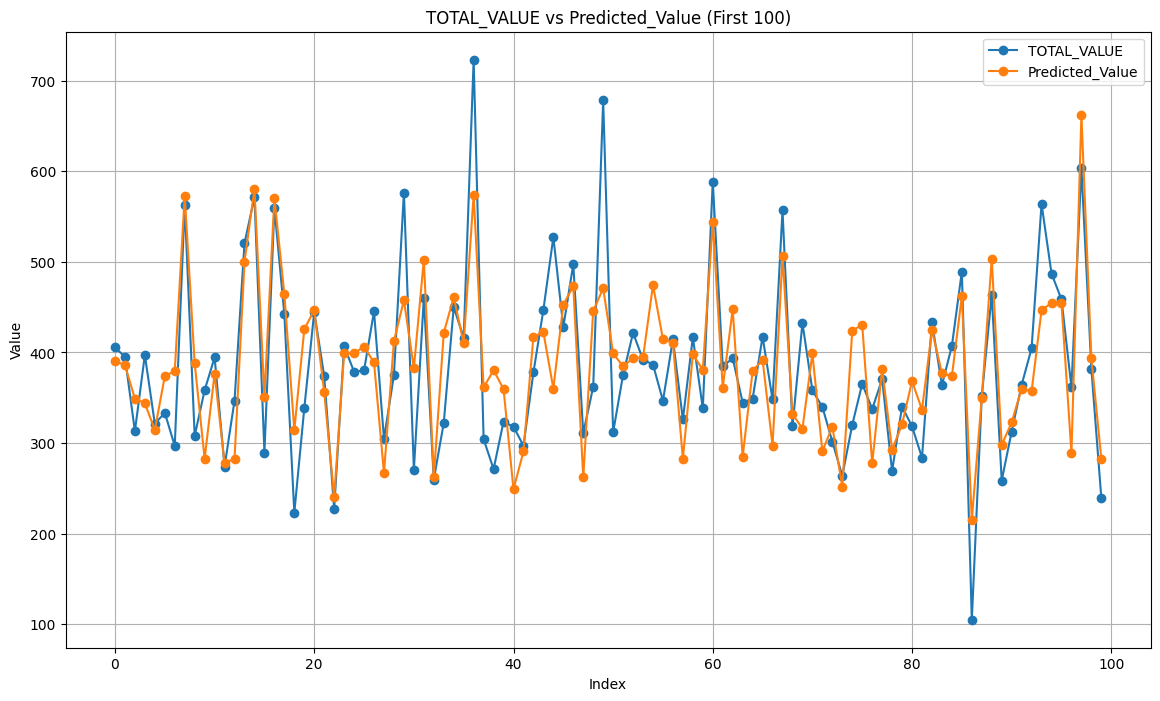

In [51]:
# prompt: 'TOTAL_VALUE'와 Predicted_Value' 컬럼값에 대해 index 컬럼을 x축으로 공유하여 plot을 그리되 100개만 그릴 수 있는 코드를 제공해주세요

import matplotlib.pyplot as plt

# Assuming 'combined_df' is your DataFrame with 'TOTAL_VALUE', 'Predicted_Value', and the original index
# Plot the first 100 data points
plt.figure(figsize=(14, 8))  # Adjust figure size as needed
plt.plot(combined_df.index[:100], combined_df['TOTAL_VALUE'][:100], marker='o',label='TOTAL_VALUE')
plt.plot(combined_df.index[:100], combined_df['Predicted_Value'][:100], marker='o',label='Predicted_Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('TOTAL_VALUE vs Predicted_Value (First 100)')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
combined_df

,TOTAL_VALUE,Predicted_Value
0,405.8,390.433052
1,395.0,386.070798
2,313.1,348.903020
3,397.2,343.906240
4,321.3,314.478927
...,...,...
1735,359.3,393.782570
1736,326.6,284.729572
1737,371.0,334.428713
1738,304.9,381.626119


In [54]:
# prompt: combined_df DataFrame 사용: TOTAL_VALUE컬럼과 Predicted_Value 컬럼을 이용하여 MSE, MAE, MAPE, MSE, RMSE 값을 산출하는 코드를 제공해주세요

import numpy as np

# Calculate Mean Squared Error (MSE)
mse = np.mean((combined_df['TOTAL_VALUE'] - combined_df['Predicted_Value'])**2)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(combined_df['TOTAL_VALUE'] - combined_df['Predicted_Value']))
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((combined_df['TOTAL_VALUE'] - combined_df['Predicted_Value']) / combined_df['TOTAL_VALUE'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 3600.7554145441113
Mean Absolute Error (MAE): 45.92035871124956
Mean Absolute Percentage Error (MAPE): 12.0948931011023
Root Mean Squared Error (RMSE): 60.00629479099765
